<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Feature_Engineering_Date.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
use_cols = ['loan_amnt', 'grade', 'purpose', 'issue_d', 'last_pymnt_d']

In [65]:
df= pd.read_csv('https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset//LoanStats_2018Q4.csv',usecols=use_cols).sample(
        10000, random_state=44)
df.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d
39437,15000.0,C,Dec-18,debt_consolidation,Mar-19
101867,20000.0,D,Oct-18,debt_consolidation,Mar-19
90842,26000.0,A,Oct-18,debt_consolidation,Mar-19
71803,17000.0,C,Nov-18,credit_card,Mar-19
18012,5500.0,A,Dec-18,credit_card,Mar-19


In [44]:
df.dtypes

loan_amnt       float64
grade            object
issue_d          object
purpose          object
last_pymnt_d     object
dtype: object

In [ ]:
#df['issue_year']=df['issue_d'].str[4:] 
#df['issue_month']=df['issue_d'].str[0:3]
#df['issue_d']= pd.to_datetime(df['issue_d']).apply(lambda x: int(x.strftime('%b-%Y')))
#df['issue_d_month_year']=df['issue_d_year'].astype(str) + df['issue_d_month'].astype(str)

In [66]:
date_columns = ['issue_d', 'last_pymnt_d']

In [67]:
for column in date_columns:
    df[column + '_month'] = df[column].astype(str).apply(lambda x: x[0:3])
    df[column + '_year'] = df[column].astype(str).apply(lambda x: x[-2:])

In [68]:
df.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d,issue_d_month,issue_d_year,last_pymnt_d_month,last_pymnt_d_year
39437,15000.0,C,Dec-18,debt_consolidation,Mar-19,Dec,18,Mar,19
101867,20000.0,D,Oct-18,debt_consolidation,Mar-19,Oct,18,Mar,19
90842,26000.0,A,Oct-18,debt_consolidation,Mar-19,Oct,18,Mar,19
71803,17000.0,C,Nov-18,credit_card,Mar-19,Nov,18,Mar,19
18012,5500.0,A,Dec-18,credit_card,Mar-19,Dec,18,Mar,19


In [59]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

grade                  7
issue_d                3
purpose               12
last_pymnt_d           6
issue_d_month          4
issue_d_year           2
last_pymnt_d_month     7
last_pymnt_d_year      3
dtype: int64

In [70]:
df['issue_d'] =  pd.to_datetime(df['issue_d'], format='%b-%y')
data['last_pymnt_dt'] = pd.to_datetime(df.last_pymnt_d, format='%b-%y')

In [71]:
df.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d,issue_d_month,issue_d_year,last_pymnt_d_month,last_pymnt_d_year,issue_dt_new
39437,15000.0,C,2018-12-01,debt_consolidation,Mar-19,Dec,18,Mar,19,2018-12-01
101867,20000.0,D,2018-10-01,debt_consolidation,Mar-19,Oct,18,Mar,19,2018-10-01
90842,26000.0,A,2018-10-01,debt_consolidation,Mar-19,Oct,18,Mar,19,2018-10-01
71803,17000.0,C,2018-11-01,credit_card,Mar-19,Nov,18,Mar,19,2018-11-01
18012,5500.0,A,2018-12-01,credit_card,Mar-19,Dec,18,Mar,19,2018-12-01


Text(0, 0.5, 'Disbursed Amount (US Dollars)')

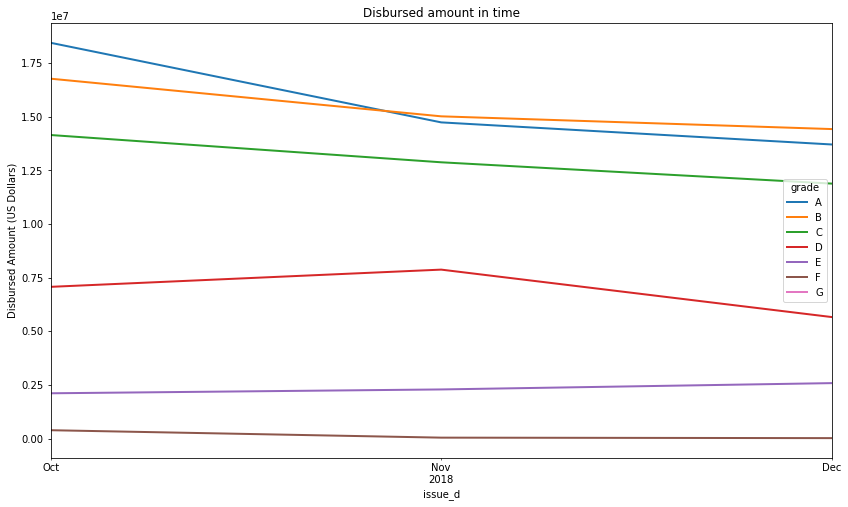

In [74]:
fig = df.groupby(['issue_d', 'grade'])['loan_amnt'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount (US Dollars)')